In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글/차트 마이너스 없애기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 범죄 - 장소별 시각화

In [3]:
cri_area=pd.read_csv('./data/crime_area.csv', encoding='euc-kr')
cri_area

,범죄대분류,범죄중분류,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,95,95,0,59,0,1,1,0,...,1,8,1,0,0,0,7,0,1,44
1,강력범죄,살인미수등,90,102,3,126,0,0,1,0,...,2,6,1,0,0,0,5,0,2,113
2,강력범죄,강도,138,182,2,423,0,26,154,1,...,6,4,0,0,0,0,44,2,6,263
3,강력범죄,강간,882,954,0,249,0,0,4,0,...,21,34,0,2,0,3,52,42,3,763
4,강력범죄,유사강간,68,63,0,30,0,0,0,0,...,1,1,0,0,0,0,12,11,1,66
5,강력범죄,강제추행,902,790,11,3324,9,66,158,13,...,39,26,1,5,3,2,110,66,43,3693
6,강력범죄,기타강간강제추행등,234,280,0,48,0,2,3,0,...,2,4,0,0,0,0,8,16,1,159
7,강력범죄,방화,261,321,1,210,2,4,1,2,...,16,11,1,0,0,0,47,24,2,545
8,절도범죄,절도,14333,19515,177,49527,1828,4718,4579,1966,...,1258,2705,40,34,1,94,11464,462,2987,85435
9,폭력범죄,상해,3373,3265,48,18320,33,110,218,28,...,124,200,20,14,4,15,873,46,78,11739


In [5]:
cri_area_data = cri_area[:17] # 강력, 절도, 폭력범죄만 추출 

# '기타'열 제거
cri_area_data = cri_area_data.drop(['기타'],axis=1)

list_sum = []
for i in cri_area_data:
   list_sum.append(cri_area_data[i].sum())
   list_sum = list_sum[1::]
   list_sum.insert(0,0)


[0,
 '살인기수살인미수등강도강간유사강간강제추행기타강간강제추행등방화절도상해폭행체포감금협박약취유인폭력행위등공갈손괴',
 33777,
 38232,
 467,
 163577,
 1978,
 5412,
 6518,
 2075,
 12351,
 4759,
 12026,
 40913,
 14121,
 3720,
 3277,
 1620,
 2274,
 1553,
 7684,
 701,
 4195,
 3941,
 6686,
 4240,
 2061,
 4386,
 197,
 115,
 24,
 158,
 21243,
 839,
 3622]

In [6]:
cri_area_data.loc['Sum'] = list_sum
cri_area_data

,범죄대분류,범죄중분류,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
0,강력범죄,살인기수,95,95,0,59,0,1,1,0,...,6,1,8,1,0,0,0,7,0,1
1,강력범죄,살인미수등,90,102,3,126,0,0,1,0,...,6,2,6,1,0,0,0,5,0,2
2,강력범죄,강도,138,182,2,423,0,26,154,1,...,8,6,4,0,0,0,0,44,2,6
3,강력범죄,강간,882,954,0,249,0,0,4,0,...,24,21,34,0,2,0,3,52,42,3
4,강력범죄,유사강간,68,63,0,30,0,0,0,0,...,2,1,1,0,0,0,0,12,11,1
5,강력범죄,강제추행,902,790,11,3324,9,66,158,13,...,179,39,26,1,5,3,2,110,66,43
6,강력범죄,기타강간강제추행등,234,280,0,48,0,2,3,0,...,1,2,4,0,0,0,0,8,16,1
7,강력범죄,방화,261,321,1,210,2,4,1,2,...,16,16,11,1,0,0,0,47,24,2
8,절도범죄,절도,14333,19515,177,49527,1828,4718,4579,1966,...,2077,1258,2705,40,34,1,94,11464,462,2987
9,폭력범죄,상해,3373,3265,48,18320,33,110,218,28,...,539,124,200,20,14,4,15,873,46,78


Text(0.5, 1.0, '범죄 장소별 범죄 발생 횟수')

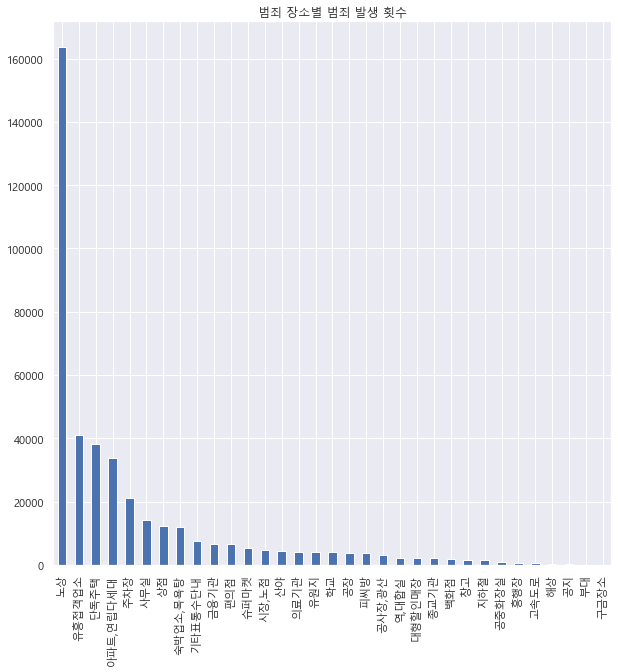

In [7]:
#장소별 범죄 현황 
cri_area_sum = cri_area_data.loc['Sum']
cri_area_sum = cri_area_sum.iloc[2::]
cri_area_sum=cri_area_sum.sort_values(ascending=False)
cri_area_sum.plot.bar(figsize=(10,10))
plt.title('범죄 장소별 범죄 발생 횟수')

In [8]:
cri_area_data = cri_area_data.groupby(['범죄대분류']).sum()
cri_area_data

,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,"시장,노점",...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
범죄대분류,,,,,,,,,,,,,,,,,,,,,
0,33777,38232,467,163577,1978,5412,6518,2075,12351,4759,...,4240,2061,4386,197,115,24,158,21243,839,3622
강력범죄,2670,2787,17,4469,11,99,322,16,277,145,...,242,88,94,4,7,3,5,285,161,59
절도범죄,14333,19515,177,49527,1828,4718,4579,1966,9520,2998,...,2077,1258,2705,40,34,1,94,11464,462,2987
폭력범죄,16774,15930,273,109581,139,595,1617,93,2554,1616,...,1921,715,1587,153,74,20,59,9494,216,576


In [9]:
cri_area_data = cri_area_data.drop(index = 0, axis=0)
cri_area_data

,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,"시장,노점",...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,2670,2787,17,4469,11,99,322,16,277,145,...,242,88,94,4,7,3,5,285,161,59
절도범죄,14333,19515,177,49527,1828,4718,4579,1966,9520,2998,...,2077,1258,2705,40,34,1,94,11464,462,2987
폭력범죄,16774,15930,273,109581,139,595,1617,93,2554,1616,...,1921,715,1587,153,74,20,59,9494,216,576


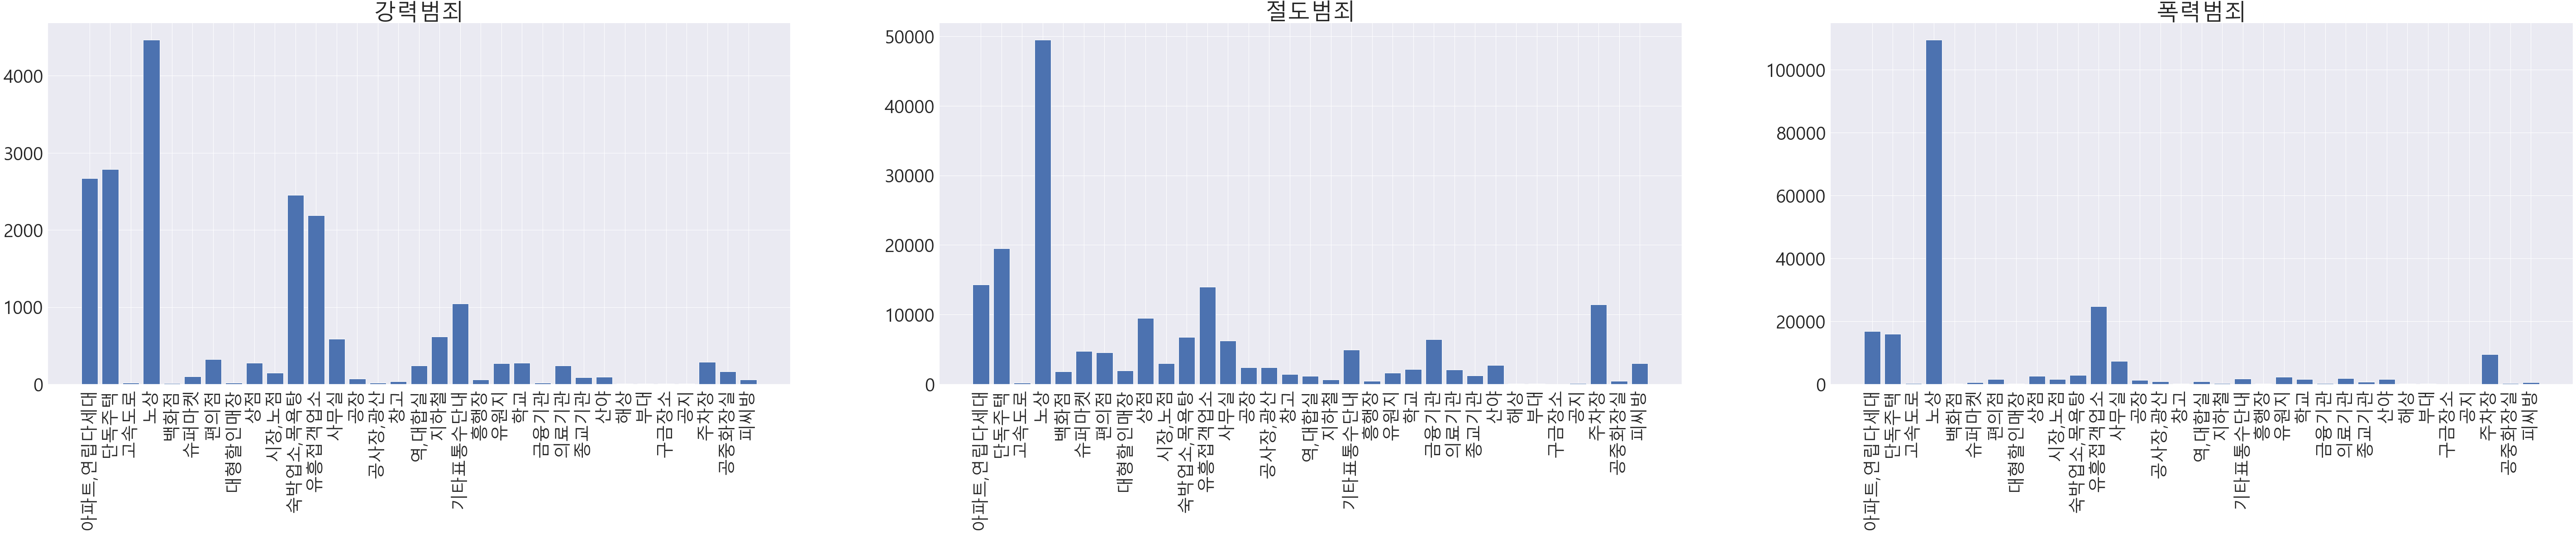

In [24]:
# lens = cri_area_data.shape[1]
# lens
n = 0
plt.figure(figsize=(100,50))
for ind, i in enumerate(cri_area_data.index):
  n+=1
  a_list = cri_area_data.iloc[ind]
  a_list = a_list[::]
  ins = list(a_list.index)
  val = a_list.values
  plt.subplot(3,3,n)
  plt.bar(ins,val)
  plt.title(i, fontsize=50)
  plt.xticks(rotation = 90, fontsize=38)
  plt.yticks(fontsize=40)
plt.show()

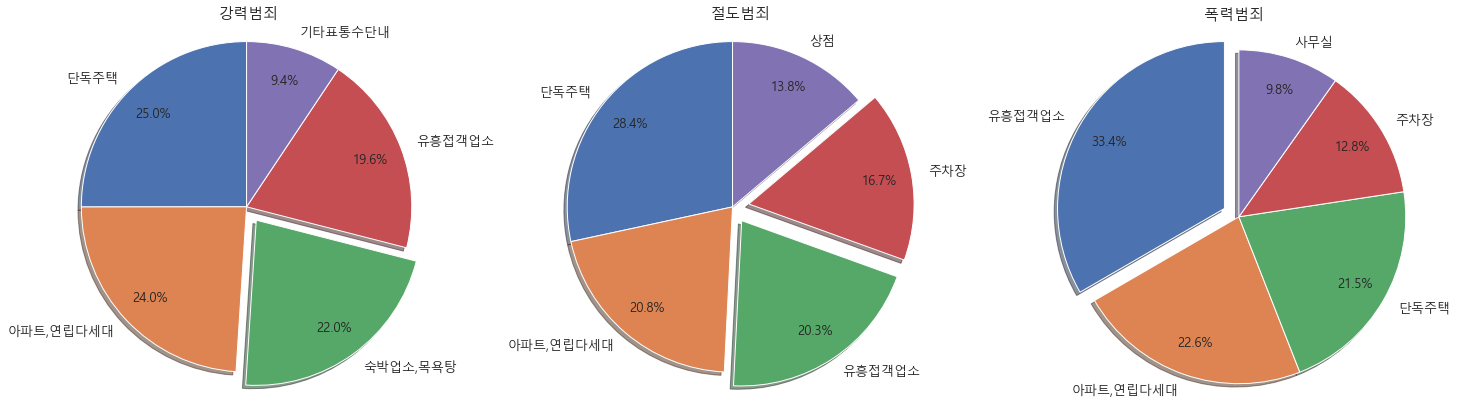

In [25]:
#노상 제외 범죄 별 발생장소 top5 pie chart
drop_ns = cri_area_data.drop(['노상'],axis=1)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
for ind, i in enumerate(drop_ns.index):
  a_list = drop_ns.iloc[ind]
  a_list = a_list.sort_values(ascending=False)
  a_list= a_list.iloc[:5]
  ins = list(a_list.index)
  val = a_list.values
  ax = axs[ind]
  if i == '강력범죄':
    explode = (0,0,0.1,0,0)
  elif i == '절도범죄':
    explode = (0,0,0.1,0.1,0)
  elif i == '폭력범죄':
    explode = (0.1,0,0,0,0)
  wedges, texts, autotexts = ax.pie(val,labels = ins,autopct='%1.1f%%', explode = explode, pctdistance=0.8, shadow=True, startangle=90,textprops = {'fontsize':13})
  ax.axis('equal')
  ax.set_title(i,fontsize=15)